
Submitted by: Group 7 ( Rukmani Thiruppathi , Venkata Kishore Kumar Pedisetty)

### Project 1

Project description: 
- Read data into Jupyter notebook, use pandas to import data into a data frame
- preprocess data: explore data, address missing data, categorical data, if there is any, and data scaling. Justify the type of scaling used in this project. 
- train your dataset using all the linear regression models you've learned so far. If your model has a scaling parameter(s) use Grid Search to find the best scaling parameter. Use plots and graphs to help you get a better glimpse of the results. 
- Then use cross validation to find average training and testing score. 
- Your submission should have at least the following regression models: KNN repressor, linear regression, Ridge, Lasso, polynomial regression, SVM both simple and with kernels. 
- Finally find the best repressor for this dataset and train your model on the entire dataset using the best parameters and predict the market price for the test_set.
- submit IPython notebook. Use markdown to provide an inline report for this project.

##### <font color = 'red'> Important note: All the group members should participate in completing this project.  This includes coding, preparing report and testing the models. 

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('bitcoin_dataset(1).csv')
test = pd.read_csv('test_set(1).csv')

In [ ]:
#transform test data same like training data check if it has missing values
#change all int to float then impute
#then subset the data(the columns)

In [2]:
data.head()

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2/17/2010 0:00,0.0,2043200.0,0.0,0.0,0.0,0.000235,0,1.0,0.0,...,31.781022,0.0,241,244,41240,244,244,65173.13,36500.0,0.0
1,2/18/2010 0:00,0.0,2054650.0,0.0,0.0,0.0,0.000241,0,1.0,0.0,...,154.463801,0.0,234,235,41475,235,235,18911.74,7413.0,0.0
2,2/19/2010 0:00,0.0,2063600.0,0.0,0.0,0.0,0.000228,0,1.0,0.0,...,1278.516635,0.0,185,183,41658,183,183,9749.98,700.0,0.0
3,2/20/2010 0:00,0.0,2074700.0,0.0,0.0,0.0,0.000218,0,1.0,0.0,...,22186.687990,0.0,224,224,41882,224,224,11150.03,50.0,0.0
4,2/21/2010 0:00,0.0,2085400.0,0.0,0.0,0.0,0.000234,0,1.0,0.0,...,689.179876,0.0,218,218,42100,218,218,12266.83,1553.0,0.0


In [3]:
data.shape

(2906, 24)

In [5]:
data.describe()

,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
count,2906.000000,2.879000e+03,2.906000e+03,2.885000e+03,2877.000000,2906.000000,2906.000000,2906.000000,2894.000000,2.906000e+03,...,2906.000000,2906.000000,2.906000e+03,2906.000000,2.906000e+03,2906.000000,2906.000000,2.906000e+03,2.906000e+03,2.906000e+03
mean,839.104218,1.151138e+07,1.344255e+10,7.398381e+07,35505.502848,0.350366,0.364074,671.673651,7.501113,1.244070e+06,...,66.747821,14.639125,1.937861e+05,102081.138334,6.844558e+07,94348.852374,63140.320028,1.566216e+06,2.036475e+05,2.024338e+08
std,2304.972497,4.200024e+06,3.866150e+10,2.924228e+08,43618.633821,0.353168,0.842259,689.561322,4.974549,2.924141e+06,...,1761.894646,20.536083,2.089146e+05,103896.929350,8.285341e+07,103966.111763,69687.052174,2.278910e+06,2.682781e+05,5.800513e+08
min,0.000000,2.043200e+06,0.000000e+00,0.000000e+00,0.000000,0.000216,0.000000,1.000000,0.000000,2.250000e-05,...,0.136531,0.000000,1.100000e+02,118.000000,4.124000e+04,118.000000,118.000000,6.150000e+03,7.000000e+00,0.000000e+00
25%,6.653465,8.485300e+06,5.363081e+07,2.916456e+05,781.000000,0.024177,0.000000,54.000000,6.066667,1.160880e+01,...,1.181945,4.156470,1.675475e+04,8025.250000,2.413376e+06,6813.500000,6765.500000,4.901712e+05,9.600325e+04,9.581680e+05
50%,235.130000,1.243115e+07,3.346869e+09,1.001414e+07,15183.000000,0.196022,0.000000,375.000000,7.916667,2.176189e+04,...,2.493564,7.822430,1.304450e+05,62337.000000,3.255271e+07,53483.000000,35283.500000,1.105205e+06,1.784685e+05,3.742576e+07
75%,594.191164,1.520051e+07,8.075525e+09,2.834038e+07,58293.000000,0.676065,0.000000,1232.995223,10.208333,1.035363e+06,...,5.915591,14.800589,3.603765e+05,190471.250000,1.080663e+08,185901.750000,113793.250000,2.031654e+06,2.588046e+05,1.312499e+08
max,19498.683330,1.683769e+07,3.265250e+11,5.352016e+09,154444.590300,1.110327,7.000000,2722.625000,47.733333,2.160975e+07,...,88571.428570,161.686071,1.072861e+06,490644.000000,2.966888e+08,470650.000000,318896.000000,4.599222e+07,5.825066e+06,5.760245e+09


### Checking VIF to identify highly correlated variables 

In [6]:
#Analyzing collinerity between independent variables
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Break into left and right hand side; y and X
y, X = dmatrices("btc_market_price ~ btc_total_bitcoins + btc_market_cap + btc_trade_volume + btc_blocks_size + btc_avg_block_size + btc_n_orphaned_blocks + btc_n_transactions_per_block + btc_median_confirmation_time + btc_hash_rate + btc_difficulty + btc_miners_revenue + btc_transaction_fees + btc_cost_per_transaction_percent + btc_cost_per_transaction + btc_n_unique_addresses + btc_n_transactions + btc_n_transactions_total + btc_n_transactions_excluding_popular + btc_n_transactions_excluding_chains_longer_than_100 + btc_output_volume + btc_estimated_transaction_volume + btc_estimated_transaction_volume_usd ", data=data, return_type="dataframe")

# For each Xi, calculate VIF, X.shape gives columns and rows so index 1 gets the number of rows
vif1 = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif1


C:\Users\Arthi\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
C:\Users\Arthi\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1386: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


[0.0,
 12.899254840596553,
 276.72767524083724,
 6.1084221783489259,
 8508.0782762872368,
 53.136325094278199,
 1.353222896147438,
 50.332041329553064,
 2.558553402631679,
 159.03226881421841,
 235.19907347980742,
 261.78805150606968,
 8.5851154709360031,
 1.0137430565345276,
 12.318084725815243,
 94.711891253914516,
 212.52608269207875,
 8533.1020688334811,
 127.26620737697223,
 100.65353805164638,
 1.2923378255392923,
 1.1474282235086728,
 27.101259545661126]

In [7]:
test.head()
test.drop("Date",axis=1,inplace=True)
sub_col=test.columns.values
sub_col

array(['btc_total_bitcoins', 'btc_market_cap', 'btc_trade_volume',
       'btc_blocks_size', 'btc_avg_block_size', 'btc_n_orphaned_blocks',
       'btc_n_transactions_per_block', 'btc_median_confirmation_time',
       'btc_hash_rate', 'btc_difficulty', 'btc_miners_revenue',
       'btc_transaction_fees', 'btc_cost_per_transaction_percent',
       'btc_cost_per_transaction', 'btc_n_unique_addresses',
       'btc_n_transactions', 'btc_n_transactions_total',
       'btc_n_transactions_excluding_popular',
       'btc_n_transactions_excluding_chains_longer_than_100',
       'btc_output_volume', 'btc_estimated_transaction_volume',
       'btc_estimated_transaction_volume_usd'], dtype=object)

In [8]:
test.info()
test.shape
# test data has no null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 22 columns):
btc_total_bitcoins                                     14 non-null float64
btc_market_cap                                         14 non-null float64
btc_trade_volume                                       14 non-null float64
btc_blocks_size                                        14 non-null float64
btc_avg_block_size                                     14 non-null float64
btc_n_orphaned_blocks                                  14 non-null int64
btc_n_transactions_per_block                           14 non-null float64
btc_median_confirmation_time                           14 non-null float64
btc_hash_rate                                          14 non-null float64
btc_difficulty                                         14 non-null float64
btc_miners_revenue                                     14 non-null float64
btc_transaction_fees                                   14 non-null float64

(14, 22)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906 entries, 0 to 2905
Data columns (total 24 columns):
Date                                                   2906 non-null object
btc_market_price                                       2906 non-null float64
btc_total_bitcoins                                     2879 non-null float64
btc_market_cap                                         2906 non-null float64
btc_trade_volume                                       2885 non-null float64
btc_blocks_size                                        2877 non-null float64
btc_avg_block_size                                     2906 non-null float64
btc_n_orphaned_blocks                                  2906 non-null int64
btc_n_transactions_per_block                           2906 non-null float64
btc_median_confirmation_time                           2894 non-null float64
btc_hash_rate                                          2906 non-null float64
btc_difficulty                                   

In [10]:
data.drop("Date",axis=1,inplace=True)

data_num=data.astype(float)
data_num.info()
data=data_num


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906 entries, 0 to 2905
Data columns (total 23 columns):
btc_market_price                                       2906 non-null float64
btc_total_bitcoins                                     2879 non-null float64
btc_market_cap                                         2906 non-null float64
btc_trade_volume                                       2885 non-null float64
btc_blocks_size                                        2877 non-null float64
btc_avg_block_size                                     2906 non-null float64
btc_n_orphaned_blocks                                  2906 non-null float64
btc_n_transactions_per_block                           2906 non-null float64
btc_median_confirmation_time                           2894 non-null float64
btc_hash_rate                                          2906 non-null float64
btc_difficulty                                         2890 non-null float64
btc_miners_revenue                            

### Missing Value Treatment

In [11]:
#Imputation 

from fancyimpute import KNN
data_numeric=data.select_dtypes(include=[np.float])
data_filled=pd.DataFrame(KNN(3).complete(data_numeric))

data_filled.columns = data_numeric.columns
data_filled.index = data_numeric.index
data_filled.head()

Using TensorFlow backend.


Imputing row 1/2906 with 0 missing, elapsed time: 2.000
Imputing row 101/2906 with 1 missing, elapsed time: 2.002
Imputing row 201/2906 with 0 missing, elapsed time: 2.004
Imputing row 301/2906 with 0 missing, elapsed time: 2.004
Imputing row 401/2906 with 0 missing, elapsed time: 2.005
Imputing row 501/2906 with 0 missing, elapsed time: 2.006
Imputing row 601/2906 with 0 missing, elapsed time: 2.007
Imputing row 701/2906 with 0 missing, elapsed time: 2.007
Imputing row 801/2906 with 0 missing, elapsed time: 2.008
Imputing row 901/2906 with 0 missing, elapsed time: 2.009
Imputing row 1001/2906 with 0 missing, elapsed time: 2.009
Imputing row 1101/2906 with 0 missing, elapsed time: 2.010
Imputing row 1201/2906 with 0 missing, elapsed time: 2.010
Imputing row 1301/2906 with 0 missing, elapsed time: 2.010
Imputing row 1401/2906 with 0 missing, elapsed time: 2.011
Imputing row 1501/2906 with 0 missing, elapsed time: 2.011
Imputing row 1601/2906 with 0 missing, elapsed time: 2.012
Imputing 

,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,0.0,2043200.0,0.0,0.0,0.0,0.000235,0.0,1.0,0.0,0.000029,...,31.781022,0.0,241.0,244.0,41240.0,244.0,244.0,65173.13,36500.0,0.0
1,0.0,2054650.0,0.0,0.0,0.0,0.000241,0.0,1.0,0.0,0.000029,...,154.463801,0.0,234.0,235.0,41475.0,235.0,235.0,18911.74,7413.0,0.0
2,0.0,2063600.0,0.0,0.0,0.0,0.000228,0.0,1.0,0.0,0.000023,...,1278.516635,0.0,185.0,183.0,41658.0,183.0,183.0,9749.98,700.0,0.0
3,0.0,2074700.0,0.0,0.0,0.0,0.000218,0.0,1.0,0.0,0.000028,...,22186.687990,0.0,224.0,224.0,41882.0,224.0,224.0,11150.03,50.0,0.0
4,0.0,2085400.0,0.0,0.0,0.0,0.000234,0.0,1.0,0.0,0.000027,...,689.179876,0.0,218.0,218.0,42100.0,218.0,218.0,12266.83,1553.0,0.0


In [12]:
data_filled.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906 entries, 0 to 2905
Data columns (total 23 columns):
btc_market_price                                       2906 non-null float64
btc_total_bitcoins                                     2906 non-null float64
btc_market_cap                                         2906 non-null float64
btc_trade_volume                                       2906 non-null float64
btc_blocks_size                                        2906 non-null float64
btc_avg_block_size                                     2906 non-null float64
btc_n_orphaned_blocks                                  2906 non-null float64
btc_n_transactions_per_block                           2906 non-null float64
btc_median_confirmation_time                           2906 non-null float64
btc_hash_rate                                          2906 non-null float64
btc_difficulty                                         2906 non-null float64
btc_miners_revenue                            

### Removing highly correlated variables 

In [13]:
df=data_filled
#sub_col.append("btc_market_price")
print(sub_col)
df_sub=df[sub_col]
#removing correlated variables
non_col=["btc_trade_volume",
"btc_n_orphaned_blocks",
"btc_median_confirmation_time",
"btc_transaction_fees",
"btc_cost_per_transaction_percent",
"btc_output_volume",
"btc_estimated_transaction_volume"
]

df_sub=df_sub[non_col]
df_sub.shape



['btc_total_bitcoins' 'btc_market_cap' 'btc_trade_volume' 'btc_blocks_size'
 'btc_avg_block_size' 'btc_n_orphaned_blocks'
 'btc_n_transactions_per_block' 'btc_median_confirmation_time'
 'btc_hash_rate' 'btc_difficulty' 'btc_miners_revenue'
 'btc_transaction_fees' 'btc_cost_per_transaction_percent'
 'btc_cost_per_transaction' 'btc_n_unique_addresses' 'btc_n_transactions'
 'btc_n_transactions_total' 'btc_n_transactions_excluding_popular'
 'btc_n_transactions_excluding_chains_longer_than_100' 'btc_output_volume'
 'btc_estimated_transaction_volume' 'btc_estimated_transaction_volume_usd']


(2906, 7)

In [14]:
from sklearn.model_selection import train_test_split
X=df_sub
#X=X.drop("btc_market_price",axis=1)
#X=X[["prev_day_volume","pricelag1","pricelag2"]]
y=df["btc_market_price"]
X, X_test, y, y_test = train_test_split(X,y,random_state=0, test_size=0.0)

len(X)
X.head()

,btc_trade_volume,btc_n_orphaned_blocks,btc_median_confirmation_time,btc_transaction_fees,btc_cost_per_transaction_percent,btc_output_volume,btc_estimated_transaction_volume
582,1.933084e+05,0.0,0.000000,4.476934,10.039596,3.147717e+05,74744.0
2001,1.360215e+07,3.0,7.133333,26.659978,1.640023,1.195838e+06,259204.0
1259,4.303075e+06,0.0,6.350000,37.364212,2.724486,8.810266e+05,171115.0
2129,3.085273e+07,2.0,7.650000,37.228229,1.019021,4.256301e+06,393711.0
667,9.835301e+04,0.0,12.016667,2.836012,3.842190,4.346336e+05,161418.0


## Linear Regression

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

In [16]:
#lm_fit=lm.fit(X_train,y_train)
#from statsmodels.formula.api  import ols

#est = ols(formula = ' y ~  X + X2', data = df).fit()
#est.summary()
scores = cross_val_score(lm, X,y, cv = 5)
print("Cross validation scores: {}".format(scores))
scores.mean()

Cross validation scores: [ 0.88570583  0.80777604  0.58187749  0.86243906  0.82103948]


0.79176758023426586

## KNN

In [17]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#test=test.select_dtypes(include=[np.float])
X=scaler.fit_transform(X)
# The same instance of the transformer can then be applied to some new test data unseen during the fit call: the same scaling and shifting operations will be applied to be consistent with the transformation performed on the train data
#X_test= scaler.transform(X_test)
# we need not scale the dependent variable as the algoritm works on finding similar record based on independent variables
#test=scaler.transform (test)



In [22]:
from sklearn.neighbors import KNeighborsRegressor
param_grid = {'n_neighbors': [2,3,4,5,6,7,8,9,10]}
#To check what parameters exits for an estimator 'knnreg.get_params().keys()'
knnreg=KNeighborsRegressor()
grid_search = GridSearchCV(knnreg, param_grid, cv=10)

grid_search.fit(X, y)



GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [21]:
grid_search.scoring

In [140]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
mean_test_score=grid_search.cv_results_["mean_test_score"]
k=[2, 3, 4, 5, 6, 7, 8, 9, 10]

Best parameters: {'n_neighbors': 5}
Best cross-validation score: 0.93


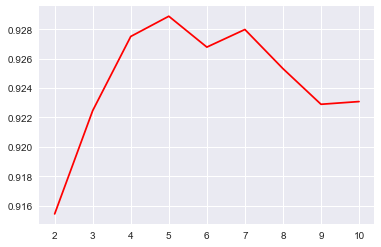

In [144]:
# plot between number of neighbours and test scores

import seaborn as sn
import matplotlib.pyplot as plt
% matplotlib inline 

plt.plot(k,mean_test_score,"r")

## Ridge

In [146]:
from sklearn.linear_model import Ridge
ridge=Ridge()
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(ridge, param_grid, cv=10)


grid_search.fit(X, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [186]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))


Best parameters: {'alpha': 0.1}
Best cross-validation score: 0.81


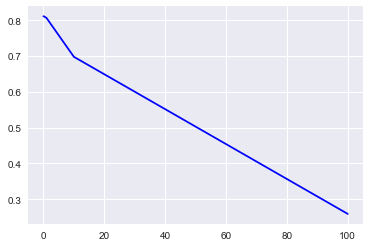

In [148]:
alpha =[0.001, 0.01, 0.1, 1, 10, 100]
mean_test_score=grid_search.cv_results_["mean_test_score"]
plt.plot(alpha,mean_test_score,"b")
    

## Lasso

In [149]:
from sklearn.linear_model import Lasso
lasso=Lasso()
# lasso model
lasso=Lasso()
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100], 'max_iter': [100,1000,10000]}

grid_search_lasso = GridSearchCV(lasso, param_grid, cv=10)

grid_search_lasso.fit(X, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100], 'max_iter': [100, 1000, 10000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [150]:
print("Best parameters: {}".format(grid_search_lasso.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_lasso.best_score_))

Best parameters: {'alpha': 1, 'max_iter': 100}
Best cross-validation score: 0.81


## Polynomial Regression
#### Degree = 2

In [113]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
lm = LinearRegression()
linreg=lm.fit(X_poly, y)
print('(poly deg 2) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))

#CV
scores = cross_val_score(lm, X_poly,y, cv = 5)
print("Cross validation scores: {}".format(scores))
scores.mean()

(poly deg 2) linear model coeff (w):
[ -3.22581263e-04   5.95920042e+04  -1.04842681e+03  -3.56799274e+02
   2.19101493e+04  -3.27106820e+03  -2.75608123e+03  -1.22699058e+03
  -3.55926410e+04  -1.04482218e+05  -2.86811860e+04   3.91547328e+03
   5.09731618e+08   2.13699776e+04  -2.59512945e+05  -2.72719155e+02
   2.65552833e+03  -7.72331067e+03   2.43479798e+07   3.77330924e+02
   2.09007357e+04   9.42998956e+02  -1.32849443e+04   2.07758906e+06
   2.59264997e+03  -1.58171928e+03  -7.39898003e+03  -1.44018788e+08
   8.73072305e+03  -1.71970835e+05   3.06702306e+03   2.18494578e+07
  -7.58901583e+07   7.12029731e+02   1.74220170e+04   1.00225879e+02]
(poly deg 2) linear model intercept (b): 123.285
Cross validation scores: [ 0.92440574  0.90179339  0.81826098  0.93262875  0.90381574]


0.89618091854908255

### Ridge on polynomial features of degree 2

In [86]:
#Ridge + polynomial regression

param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(ridge, param_grid, cv=10)

grid_search.fit(X_poly, y)
grid_search.cv_results_

{'mean_fit_time': array([ 0.00579245,  0.00479884,  0.00249634,  0.003125  ,  0.00242069,
         0.00316288]),
 'mean_score_time': array([ 0.        ,  0.00120008,  0.        ,  0.        ,  0.00167592,  0.        ]),
 'mean_test_score': array([ 0.90301561,  0.90202991,  0.89906187,  0.81515464,  0.69906258,
         0.30102142]),
 'mean_train_score': array([ 0.92448132,  0.91769086,  0.90453652,  0.8411696 ,  0.70920659,
         0.30749538]),
 'param_alpha': masked_array(data = [0.001 0.01 0.1 1 10 100],
              mask = [False False False False False False],
        fill_value = ?),
 'params': ({'alpha': 0.001},
  {'alpha': 0.01},
  {'alpha': 0.1},
  {'alpha': 1},
  {'alpha': 10},
  {'alpha': 100}),
 'rank_test_score': array([1, 2, 3, 4, 5, 6]),
 'split0_test_score': array([ 0.92122791,  0.91937882,  0.90881774,  0.86755699,  0.73910956,
         0.29993331]),
 'split0_train_score': array([ 0.92402053,  0.91655288,  0.90340627,  0.83727581,  0.69714519,
         0.29980686]),


In [87]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'alpha': 0.001}
Best cross-validation score: 0.90


### Lasso on polynomial features of degree 2

In [88]:
#Lasso with polynomial features
lasso=Lasso()
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100], 'max_iter': [100,1000,10000]}

grid_search_lasso = GridSearchCV(lasso, param_grid, cv=10)

grid_search_lasso.fit(X_poly, y)

C:\Users\Arthi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Arthi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Arthi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Arthi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increa

C:\Users\Arthi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Arthi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Arthi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Arthi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increa

GridSearchCV(cv=10, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100], 'max_iter': [100, 1000, 10000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [89]:
print("Best parameters: {}".format(grid_search_lasso.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_lasso.best_score_))

# fit data using lasso with best parameters 


Best parameters: {'alpha': 0.01, 'max_iter': 1000}
Best cross-validation score: 0.91


#### Degree 3

In [114]:
poly = PolynomialFeatures(degree=3)
X_poly3 = poly.fit_transform(X)

lm = LinearRegression()
linreg=lm.fit(X_poly3, y)
print('(poly deg 3) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 3) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))

#CV
scores = cross_val_score(lm, X_poly3,y, cv = 5)
print("Cross validation scores: {}".format(scores))

(poly deg 3) linear model coeff (w):
[ -7.77073144e+05   3.10676986e+05   1.28558727e+02  -1.32600548e+03
   2.09473380e+04  -1.73436701e+03  -4.02848108e+03   5.74942353e+03
  -3.15338974e+05  -3.51460406e+04  -8.19830319e+05   1.84600665e+05
  -1.23496930e+10  -3.68034128e+05  -3.77545690e+06  -4.04907621e+03
   1.15117975e+04   3.27110430e+03   9.81685318e+07   3.72643777e+04
  -8.00787030e+04   1.22094094e+03  -7.06860138e+03   7.69433966e+07
   2.43515023e+04   1.25548297e+04   5.09222943e+03  -1.23501174e+08
  -1.44430477e+05  -3.26938443e+05   1.43791395e+03   3.21148662e+06
  -1.25644433e+05  -1.32134539e+04   2.17450557e+04  -1.89979890e+04
   9.33707668e+04   1.16325537e+06  -1.36450137e+05   1.70764900e+05
   1.81843979e+09   8.06009626e+05   1.63489068e+06   3.49059335e+05
  -5.64370282e+05  -7.56016118e+05  -3.76930765e+09  -1.30988451e+06
  -4.66484550e+05   9.54102231e+04   8.91625727e+04   4.24305366e+10
  -1.38594906e+06   1.06701766e+07  -3.06244988e+05  -5.85813218e+

### Ridge on polynomial features of degree 3

In [187]:
#Ridge + polynomial regression deg=3

param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(ridge, param_grid, cv=10)

grid_search.fit(X_poly3, y)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'alpha': 0.001}
Best cross-validation score: 0.90


### Lasso on polynomial features of degree 3

In [188]:
#Lasso with polynomial features
lasso=Lasso()
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100], 'max_iter': [100,1000,10000]}

grid_search_lasso = GridSearchCV(lasso, param_grid, cv=10)

grid_search_lasso.fit(X_poly3, y)



C:\Users\Arthi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Arthi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Arthi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Arthi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increa

C:\Users\Arthi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Arthi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Arthi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Arthi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increa

C:\Users\Arthi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Arthi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Arthi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Arthi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increa

GridSearchCV(cv=10, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100], 'max_iter': [100, 1000, 10000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [189]:
print("Best parameters: {}".format(grid_search_lasso.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_lasso.best_score_))

Best parameters: {'alpha': 0.1, 'max_iter': 10000}
Best cross-validation score: 0.92


## SVM

### Linear and Kernelized SVM

In [94]:
from sklearn.svm import SVR
svr = SVR(kernel = 'linear')
param_grid={"epsilon" : [0.01,0.1,1,10,100],"C" : [1,10,100,1000,10000],"degree" : [2,3]}
grid_search = GridSearchCV(svr, param_grid, cv=10)
grid_search.fit(X, y)


GridSearchCV(cv=10, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'epsilon': [0.01, 0.1, 1, 10, 100], 'C': [1, 10, 100, 1000, 10000], 'degree': [2, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [96]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10000, 'degree': 2, 'epsilon': 100}
Best cross-validation score: 0.80


In [97]:
svr = SVR(kernel = 'poly')
param_grid={"epsilon" : [0.01,0.1,1,10,100],"C" : [1,10,100,1000,10000],"degree" : [2,3]}
grid_search = GridSearchCV(svr, param_grid, cv=10)
grid_search.fit(X, y)


GridSearchCV(cv=10, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'epsilon': [0.01, 0.1, 1, 10, 100], 'C': [1, 10, 100, 1000, 10000], 'degree': [2, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [98]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10000, 'degree': 2, 'epsilon': 100}
Best cross-validation score: 0.24


In [100]:
svr = SVR(kernel = 'rbf')
param_grid={"epsilon" : [0.01,0.1,1,10,100],"C" : [1,10,100,1000,10000],"degree" : [2,3]}
grid_search = GridSearchCV(svr, param_grid, cv=10)
grid_search.fit(X, y)



GridSearchCV(cv=10, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'epsilon': [0.01, 0.1, 1, 10, 100], 'C': [1, 10, 100, 1000, 10000], 'degree': [2, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [101]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10000, 'degree': 2, 'epsilon': 10}
Best cross-validation score: 0.83


# Summary of Models Built: 

Missing Value Treatment:
Few columns had missing values, so used KNN algorithm through fancy impute to populate the data 

Multi Collinearity:
Correlation between variuos models built were checked. Based on VIF (variance inflation factor) highly correlated variables were removed as unreliable R squared values were obtained

Non correlated variables included in the model: 
"btc_trade_volume",
"btc_n_orphaned_blocks",
"btc_median_confirmation_time",
"btc_transaction_fees",
"btc_cost_per_transaction_percent",
"btc_output_volume",
"btc_estimated_transaction_volume"


Selecting best parameter value and validating model efficiency:

Linear regression :
Cross validation score:  0.79

KNN:
Best parameters: {'n_neighbors': 5}
Best cross-validation score: 0.93

Ridge:
Best parameters: {'alpha': 0.1}
Best cross-validation score: 0.81

Lasso:
Best parameters: {'alpha': 1, 'max_iter': 100}
Best cross-validation score: 0.81

Polynomial Regression:
Degree 2:
Cross Validation score: 0.8962

Performing Ridge using polynomial features of degree 2:
Best parameters: {'alpha': 0.001}
Best cross-validation score: 0.90

Performing Lasso using polynomial features of degree 2:
Best parameters: {'alpha': 0.01, 'max_iter': 1000}
Best cross-validation score: 0.91

Polynomial Regression:
Degree 3:
Cross Validation score: 0.895

Performing Ridge using polynomial features of degree 3:
Best parameters: {'alpha': 0.001}
Best cross-validation score: 0.90
Performing Lasso using polynomial features of degree 3:
Best parameters: {'alpha': 0.1, 'max_iter': 10000}
Best cross-validation score: 0.92

SVM Linear: 
Best parameters: {'C': 10000, 'degree': 2, 'epsilon': 100}
Best cross-validation score: 0.80

SVM Kernelized 


"polynomial":
Best parameters: {'C': 10000, 'degree': 2, 'epsilon': 100}
Best cross-validation score: 0.24

"RBF":
Best parameters: {'C': 10000, 'degree': 2, 'epsilon': 10}
Best cross-validation score: 0.83

## Best Model :

Based on cross validation score/ R square value KNN has the highest score when number of neighbors used to predict the market price is 5.
Lasso applied on polynomial features of degree 3 gave a cross validation score of 0.92. 

However, KNN model is simple and easier to interpret. Therfore, choosing KNN with K=5 (num_neighbors =5 ) to fit the entire given dataset and use the model to predict bit coin price of test data


In [128]:
# pedict test
knnreg = KNeighborsRegressor(n_neighbors = 5)
knnreg.fit(X,y)
test=test[non_col]
test["predicted_market_price"]=knnreg.predict(test)
test["predicted_market_price"]

#Same values are observed as the bitcoin price will not highly fluctuate over consecutive dates


0     13739.325669
1     13739.325669
2     13739.325669
3     13739.325669
4     13739.325669
5     13739.325669
6     13739.325669
7     13739.325669
8     13739.325669
9     13739.325669
10    13739.325669
11    13739.325669
12    13739.325669
13    13739.325669
Name: predicted_market_price, dtype: float64